<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula03_Tratamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from math import ceil

from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

import seaborn as srn

In [5]:
# Carregando base de dados
base = pd.read_csv('iris2.csv')
print(base.head())
 # Verificando linhas e colunas
print(base.shape)

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [6]:
# Semente aleatoria
np.random.seed(3000)
# 150 amostras, de 0 a 1, segundo as probabilidade indicadas por p
# a = 0 testes e a = 1 treinamento, probabilidade (p) 70% para a = 0
amostra = np.random.choice(a = [0, 1], size = 150, replace = True,
                           p=[0.7,0.3])
# Visualizar em variable explorer.

print(len(amostra)) # comprimento

150


In [7]:
print(len(amostra[amostra==1])) # 39 dados separados para teste

39


In [8]:
print(len(amostra[amostra==0])) # 111 dados separados para treinos. Foi escolhidos aleatoriamente

111


In [9]:
print(amostra)

[0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 0]


In [10]:
# Nova base de dados gerados a partir dos indices obtidos no teste amostra == 0
base_trein = base.loc[amostra == 0] # Localiza os indices em que amostra == 0 e armazena em base treinamento
print(base_trein.shape)

(111, 5)


In [11]:
base_teste = base.loc[amostra == 1] # Indices em que o array é igual a 1
print(base_teste.shape)

(39, 5)


In [12]:
# AMOSTRAGEM ESTRATIFICADA

# No treianemnto gera uma base de dados balanceada para uma base de dados desbalanceada
print(base['class'].value_counts())

x, _, y, _ = train_test_split(base.iloc[:,0:4], base.iloc[:,4], test_size = 0.3, stratify = base.iloc[:,4])

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


In [14]:
# Sem considerar a estratificação
x, _, y, _ = train_test_split(base.iloc[:,0:4], base.iloc[:,4], test_size = 0.3)
print(y.value_counts()) # Vê a divisão da base de dados

Iris-versicolor    36
Iris-setosa        35
Iris-virginica     34
Name: class, dtype: int64


## Base de dados de mulheres inférteis

In [15]:
# Base de dados de mulheres inferteis
infert = pd.read_csv('infert.csv')
print(infert.head())

   Unnamed: 0 education  age  parity  induced  case  spontaneous  stratum  \
0           1    0-5yrs   26       6        1     1            2        1   
1           2    0-5yrs   42       1        1     1            0        2   
2           3    0-5yrs   39       6        2     1            0        3   
3           4    0-5yrs   34       4        2     1            0        4   
4           5   6-11yrs   35       3        1     1            1        5   

   pooled.stratum  
0               3  
1               1  
2               4  
3               2  
4              32  


In [17]:
# Mostra a contagem de registros considerados o atributo educação
print(infert['education'].value_counts()) # Quantidade desbalanceada

x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:,1], test_size = 0.6, stratify = infert.iloc[:,1])

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64


In [18]:
x1, _, y1,_ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:,1], test_size = 0.6)

print(y1.value_counts())

6-11yrs    49
12+ yrs    47
0-5yrs      3
Name: education, dtype: int64


In [19]:
# AMOSTRAGEM SISTEMATICA

# criação das variáveis

tam_populacao = 150 # quantidade de instancias da base IRIS
tam_amostra = 15  # quantidade de instancias que serao amostradas
espa = ceil(tam_populacao / tam_amostra)
print(espa)

10


In [20]:
# DEFINIR UM VETOR RANDOMICO PARA INICIALIZAR VETOR DE ESCOLHIDOS
# Iniciando em 1 até espa |+ 1
r_esco = np.random.randint(low = 1, high = espa + 1, size = 1)
print(r_esco)

[10]


In [21]:
# Criamos um for para somar os proximos valores, baseado no primeiro valor r
acumulador = r_esco[0] # Primeiro elemento
sorteados = []
for i in range(tam_amostra):
    sorteados.append(acumulador)
    acumulador += espa
print(sorteados)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]


In [22]:
print(len(sorteados))

15


In [ ]:
# Carregando a base de dados e criamos a base_final somente com os valores sorteados
base = pd.read_csv('iris2.csv')
base_final = base.loc[sorteados]
print(base_final)

In [25]:
# Métricas de centrailidade e variabillidade
# Criação da variável com os  salarios dos jogadores
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

In [26]:
print(np.mean(jogadores)) # média
print(np.median(jogadores)) # mediana
 # media  = media = moda = simétrica

181111.11111111112
40000.0


In [27]:
# Criação da variável para geração dos quartis(0%, 25%...)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
print(quartis)

[ 12000.  30000.  40000. 250000. 800000.]


255307.87514511007


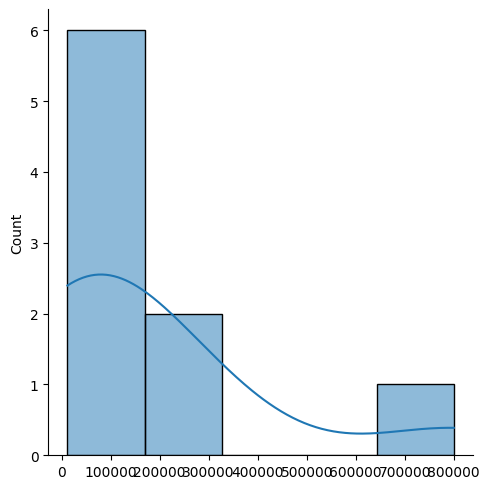

In [28]:
# Visualização do desvio padrão. ddof = 1 -> default
print(np.std(jogadores, ddof = 1))
# Curtóse
# Visualização de estatiticas mais detalhada usando a biblioteca scipy
# Assimetria: moda, mediana e media sao iguais (simetria) (A=0), assimetrica (A<0 A é o coeficiente de Pearson)
#Curtose: achatamento da curva normal. C <  0,263 distribuição leptocurtica(mais afilada)
# c = 0,263 dist. mesocurtica c>0,263 distr. platicurtica (mais achatado)
stats.describe(jogadores)

srn.displot(x=jogadores, kde = True)

In [29]:
# DISTRIBUIÇÃO NORMAL

# Conjunto de objetos em uma sacola contendo peso médio 8kg e o desvio padrão 2kg
# Qual a probabilidade de tirar um objeto que o peso é menor que 6kg?

norm.cdf(6, 8, 2)

0.15865525393145707

In [30]:
# sf é a função de sobrevivencia ou confiabilidade
norm.sf(6, 8, 2)
1 -  norm.cdf(6, 8, 2)

0.8413447460685429

In [31]:
# Qual a probabilidade de tirar um objeto  que o peso é menor que 6 ou maior que 10 quilos
norm.cdf(6, 8, 2) + norm.sf(10,8,2) # Probabilidade função acumulada

0.31731050786291415

In [32]:
# Qual a probabilidad de tirar um objeto que peso é menor que 10 e maior que 8kg
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

In [33]:
# TESTES PARA VERIFICAÇÃO DA DISTRIBUIÇÃO NORMAL
 # CRIAÇÃO DE UMA VARIAVEL COM DAODS EM UMA DISTRIBUIÇÃO NORMAL COM A FUNAÇAO RVS(1000ELEMENTOS)
dados = norm.rvs(size = 1000)
stats.describe(dados)
print(dados)

[ 1.66289866e+00  1.07063919e+00  2.72797530e-01  1.00033773e+00
  2.01510009e+00  8.20777777e-02  7.42469630e-01  6.16581839e-01
  1.74588227e-01  3.25392429e-01  1.27008662e+00  8.07799014e-01
 -1.81031105e+00  4.00093595e-02 -1.77133523e+00  2.21993711e+00
  5.56478096e-01 -1.49367900e-01 -2.14109063e-02  1.91918534e-01
  1.64496538e-01  6.94618523e-01 -6.22813051e-01 -6.57030640e-01
  9.13058349e-01  7.44151664e-01 -2.40425001e-01  1.06768167e+00
 -5.87461020e-01  2.72940146e-01 -3.08219609e-01 -7.09991276e-01
 -4.28590869e-01  1.84934715e-01 -1.48575422e+00 -1.51633899e+00
 -1.89163230e-02 -9.55471368e-01  1.50659498e-01  2.43566572e-01
 -6.63074985e-01  1.98577377e+00  6.85553038e-01 -7.42854693e-01
  2.87344142e-01  3.71391383e-01  8.14314014e-01 -1.63306908e-01
 -1.63726801e+00  3.01765637e-01 -1.46041769e+00 -1.34704746e+00
 -7.77811134e-02 -7.96088425e-01 -1.52323606e+00 -8.06888715e-01
 -9.91570016e-01  5.56277899e-01  4.34771860e-01 -4.79773646e-01
  2.47018884e+00 -1.15830

Text(0.5, 1.0, 'Dados')

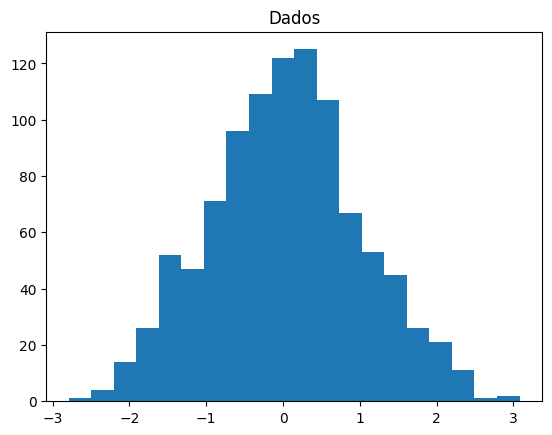

In [34]:
# HISTOGRAMA
plt.hist(dados, bins = 20)
plt.title('Dados')

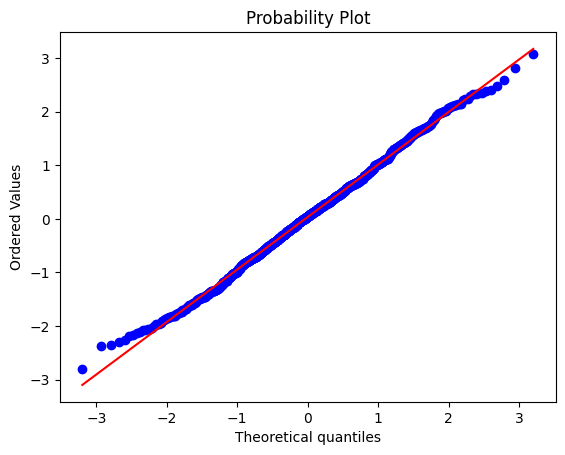

In [35]:
fig,ax = plt.subplots()
stats.probplot(dados, fit = True, plot=ax)
plt.show()

In [36]:
stats.shapiro(dados) # Execução do teste de Shapiro

ShapiroResult(statistic=0.9975739121437073, pvalue=0.14609172940254211)

In [37]:
# Simulação distribuiçõe assimetricas
dados2 = skewnorm.rvs(5, size = 1000) # assimetrica positiva
stats.describe(dados2)

DescribeResult(nobs=1000, minmax=(-0.3698857329213739, 2.9545178847388303), mean=0.7819421367000096, variance=0.39140380921843165, skewness=0.8070943184546933, kurtosis=0.44814005999125417)

Text(0.5, 1.0, 'Dados')

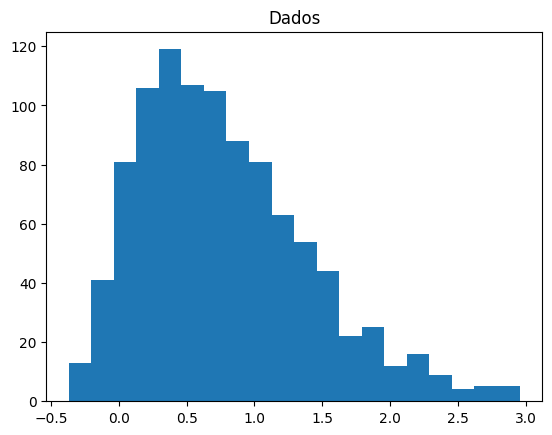

In [38]:
# Histograma
plt.hist(dados2, bins = 20)
plt.title('Dados')

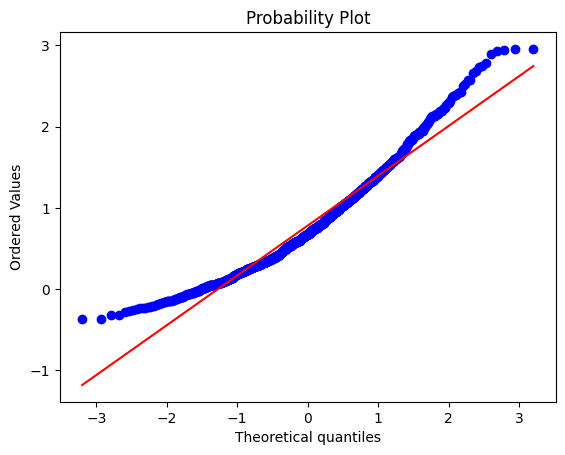

In [39]:
# Geração de grafico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit = True, plot = ax)
plt.show() # "sorriso" p cima assimetria posisitva

In [40]:
stats.shapiro(dados2)

ShapiroResult(statistic=0.9556121826171875, pvalue=7.821922442697386e-17)

In [41]:
# Assimetria negativa
dados3 = skewnorm.rvs(-5, size = 1000) #skewnorm - negativa
stats.describe(dados3)

DescribeResult(nobs=1000, minmax=(-3.719810764507136, 0.2851074204173555), mean=-0.7931227167928722, variance=0.45043269342462844, skewness=-0.9630605736178811, kurtosis=0.7987624453979811)

Text(0.5, 1.0, 'Dados')

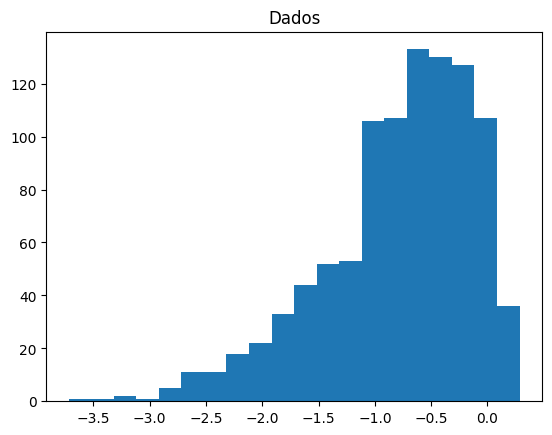

In [42]:
plt.hist(dados3, bins = 20)
plt.title('Dados')

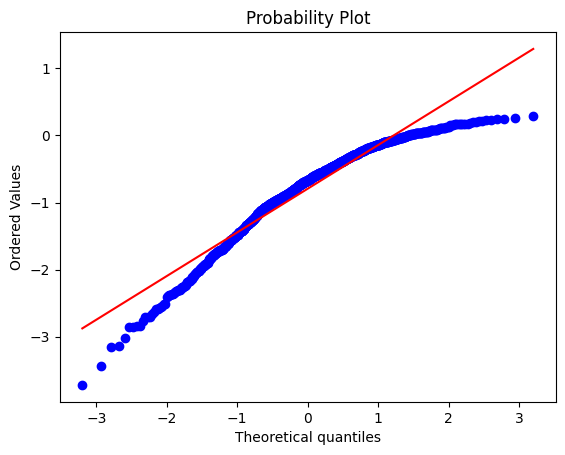

In [43]:
fig, ax = plt.subplots()
stats.probplot(dados3, fit = True, plot = ax)
plt.show() # Assimetria negativa

In [44]:
stats.shapiro(dados3)

ShapiroResult(statistic=0.9381975531578064, pvalue=5.889874281963624e-20)